In [20]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

import torchvision.datasets as dset

#import torchvision.utils as vutils


plt.ion()   # interactive mode

In [21]:
def GetPretrainedModel(params, num_classes):
    if params['model'] == 'resnet18':
        model = models.resnet18(pretrained=True)
    elif params['model'] == 'resnet34':
        model = models.resnet34(pretrained=True)

    else:
        raise ValueError('Unknown model type')
    num_features = model.fc.in_features
    model.fc = SigmoidLinear(num_features, num_classes)
    return model 

In [22]:
# imgFolder = '/home/dl/Documents/GAN-Metrics/new_gan_exps/repo/samples/mnist/true/'
# trans = transforms.Compose([
#             transforms.Scale(32),
#             transforms.ToTensor(),
#             #transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
#             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
#         ])
# dataset = dset.ImageFolder(root=imgFolder, transform=trans)
# dataloader = torch.utils.data.DataLoader(
#             dataset, batch_size=4, num_workers=int(2),
#             shuffle=False)
# tmp,_ = next( iter (dataloader))
# print(tmp.size())
# print(tmp[0][0]==tmp[0][1])
# print((tmp[0][0]==tmp[0][2]).sum())
# print(tmp[0][0][10])

In [23]:
def get_same_index(target, label):
    label_indices = []

    for i in range(len(target)):
        if target[i] == label:
            label_indices.append(i)

    return label_indices

In [24]:
#torch.utils.data.sampler.SubsetRandomSampler(indices)
data_dir = '/home/doli/datasets/cifar10/'
dataset_train = dset.CIFAR10(root=data_dir, download=True, train = True,
                             transform=transforms.Compose([
                                transforms.ToTensor(),
                                #transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
                         ]))
dataset_test = dset.CIFAR10(root=data_dir, download=True, train = False,
                         transform=transforms.Compose([
#                                 transforms.Resize(224),
#                                 transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                #transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
                         ]))
    
assert dataset_train
dataloaders = {'train': torch.utils.data.DataLoader(dataset_train, batch_size=64,
                                          shuffle=True, num_workers=int(10)),
               'val': torch.utils.data.DataLoader(dataset_test, batch_size=64,
                                          shuffle=False, num_workers=int(10)),
              }

dataset_sizes = {'train':len(dataset_train), 'val':len(dataset_test)}
print(dataset_sizes)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Files already downloaded and verified
Files already downloaded and verified
{'train': 50000, 'val': 10000}


In [19]:

iter(dataloaders['train']).next()

TypeError: Traceback (most recent call last):
  File "/home/doli/python3_virtualenv/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/doli/python3_virtualenv/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 187, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/home/doli/python3_virtualenv/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 187, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/home/doli/python3_virtualenv/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 189, in default_collate
    raise TypeError((error_msg.format(type(batch[0]))))
TypeError: batch must contain tensors, numbers, dicts or lists; found <class 'PIL.Image.Image'>


In [27]:
x, y= next( iter(dataloaders['train']))
print(x[0,0])
x.max()
# tmp3 = torch.cat((tensor, tensor, tensor), 1)


# print((tmp3[:,0,:,:] == tensor).sum())
# print(tensor.size())
# print((tmp3[0,2,:,:] == tensor[0]).sum())

tensor([[0.3176, 0.3373, 0.3529,  ..., 0.2863, 0.2863, 0.2863],
        [0.3216, 0.3412, 0.3529,  ..., 0.2902, 0.2902, 0.2941],
        [0.3176, 0.3373, 0.3529,  ..., 0.2902, 0.2863, 0.2863],
        ...,
        [0.2980, 0.3137, 0.3451,  ..., 0.4000, 0.3412, 0.2902],
        [0.2941, 0.3137, 0.3333,  ..., 0.3922, 0.3961, 0.2902],
        [0.2863, 0.3059, 0.3216,  ..., 0.3608, 0.3333, 0.1804]])


tensor(1.)

In [28]:
def get_same_index(target, label):
    label_indices = []

    for i in range(len(target)):
        if target[i] == label:
            label_indices.append(i)

    return label_indices

In [29]:
idx = get_same_index(y, 3)
print(idx)
print(torch.utils.data.sampler.SubsetRandomSampler(idx))
y[idx]

[3, 12, 14, 19, 41, 54, 61, 62]


tensor([3, 3, 3, 3, 3, 3, 3, 3])

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fdbda105470>>
Traceback (most recent call last):
  File "/home/doli/python3_virtualenv/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/doli/python3_virtualenv/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/doli/python3_virtualenv/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 87, in get_connection
    c = Client(

torch.Size([64, 3, 32, 32]) torch.Size([64])


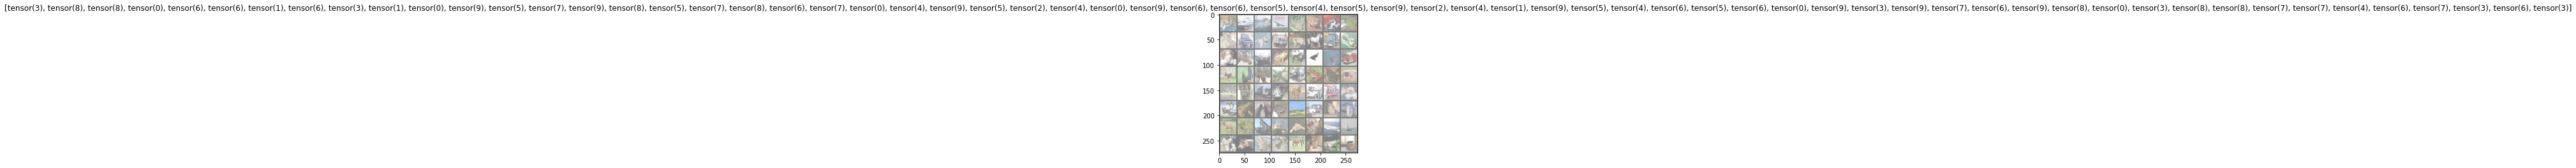

In [31]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5,0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['val']))
print(inputs.size(),classes.size())
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[x for x in classes])

In [32]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                #inputs = torch.cat((inputs, inputs, inputs), 1)
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


In [11]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [12]:
#model_ft = torchvision.models.resnet34(pretrained=False)
model_ft = getattr(models, 'resnet34')(pretrained=False)
print(model_ft)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [13]:

num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 10)
input = torch.FloatTensor().cuda()
#model_ft.load_state_dict(torch.load('/home/doli/GAN/trained_resNets/mnist/resnet34_\
#epoch20_Norm.pth'))
#model_ft.load_state_dict(torch.load('/home/doli/Downloads/resnet34_epoch20_Norm.pth'))
model_ft.load_state_dict(torch.load('/home/doli/GAN/trained_resNets/fashion-mnist/resnet34_epoch10_Norm.pth'))
model_ft = model_ft.to(device)

print(model_ft)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [14]:
#sel_model = train_model(sel_model, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=20)
sel_model = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=2)

Epoch 0/1
----------
val Loss: 0.2002 Acc: 0.9474

Epoch 1/1
----------
val Loss: 0.2002 Acc: 0.9474

Training complete in 0m 22s
Best val Acc: 0.947400


In [13]:
########torch.save(sel_model.state_dict(), '/home/doli/GAN/trained_resNets/fmnist/resnet34_epoch20_Norm.pth')

# Generate random weight net

In [1]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.12)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.12)
        m.bias.data.fill_(0)

In [4]:
random_model = torchvision.models.resnet34()
random_model.apply(weights_init)
torch.save(random_model.state_dict(), '/home/dl/Documents/GAN-Metrics/checkpoint/mnist/resnet34_random.pth')